In [1]:
# 1) Design model (input size, output size, forward pass)
# 2) Construct loss and optimizer
# 3) Training loop
#    - forward pass: compute prediction and loss
#    - backward pass: gradients
#    - update weights


# SIFAR-10
# DataLoader, Transformation
# Multilayer Neural Net, activation function
# Loss and Optimizer
# Training Loop (batch training)
# Model evaluation
# GPU support

# ENV: Python 3.9.12

In [9]:
import torch
import torch.nn as nn
from torch.optim import lr_scheduler
import torchvision # some builtin datasets
from torchvision import transforms, datasets, models

import math
import time
import copy
import os
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Settings

# device config
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device:", device)

# hyper parameters
num_epoches = 20
batch_size = 10
learning_rate = 0.001

# for normalization
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

device: cuda


In [15]:
data_transforms = {
    'train':
    transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean,std)
        ]),
    'val':
    transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean,std)
        ])
}

# import data
data_dir = "./data/hymenoptera"
sets = ['train', 'val']
image_datasets = {
    x: datasets.ImageFolder(os.path.join(data_dir, x),
                            data_transforms[x])
    for x in sets
}

dataloaders = {
    x: torch.utils.data.DataLoader(image_datasets[x], 
                                   batch_size=4,
                                   shuffle=True,
                                   num_workers=0)
    for x in sets
}

dataset_sizes = {x: len(image_datasets[x]) for x in sets}
class_names = image_datasets['train'].classes
print(class_names)

['ants', 'bees']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([4, 3, 224, 224]) torch.Size([4])
torch.Size([4, 3, 224, 224]) torch.Size([4])


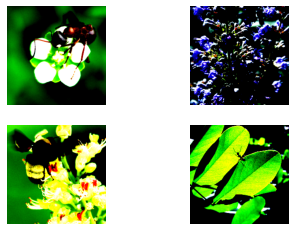

In [26]:
examples = iter(dataloaders['train'])
samples, labels = examples.next()
print(samples.shape, labels.shape)

examples = iter(dataloaders['val'])
samples, labels = examples.next()
print(samples.shape, labels.shape)

for i in range(4):
    plt.subplot(2, 2, i+1)
    img = samples[i].permute(1, 2, 0) #change from C, H, W to H, W, C.
    plt.imshow(img) 
    plt.axis("off")
plt.show()

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epoches=10):
    # Learning rate scheduling should be applied after optimizer's update
    # e.g.,
    # for epoch in range(100):
    #   train()
    #   validate()
    #   scheduler.step()
    
    since = time.time()

    best_model_wts = copy.deepcopy.(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epoches):
        print('Epoch {}/{}'.format(epoch, num_epoches - 1))
            

In [28]:
# Method 1:
# Load a pretrained model and reset final fully connected layer
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(class_names))
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
# StepLR decays the learning rate by a factor of 0.1 every 7 epochs

model = train_model(model, criterion, optimizer, step_lr_scheduler, num_epoches=num_epoches)

In [ ]:
# Freeze all the network except the final layer.
# Set requires_grad == False to free the parameters so that the gradients are not
# computed in backward
model = models.resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad = True by default
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(class_names))
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model2.parameters(), lr=learning_rate, momentum=0.9)
step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

model = train_model(model, criterion, optimizer, step_lr_scheduler, num_epoches=num_epoches)